In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Activation, GRU, Dense
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from collections import OrderedDict, defaultdict
plt.rcParams['figure.figsize'] = [10, 8]

/home/tavish/miniconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', usecols = [0])
df.shape

(145063, 1)

In [4]:
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', nrows=1)
df.shape

(1, 804)

In [10]:
# read requests for 145k articles on day 1
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', usecols = [1])
df.fillna(0, inplace=True) # fill missing vals with 0
df.sort_values(by=[df.columns[0]], ascending=False, inplace=True)
df.head()

,2015-07-01
38573,20381245.0
9774,11952559.0
74114,8039732.0
139119,2983623.0
116196,2038711.0


In [11]:
# total requests on day 1
df.sum()

2015-07-01    148672476.0
dtype: float64

In [20]:
# total requests excluding 70k most popular contents
# why 70k? this provides us with a nicely skewed distribution down the line
df[70000:].sum()

2015-07-01    954056.0
dtype: float64

In [21]:
# exclude top 70k contents from datafram
df = df[70000:]

In [59]:
df.head()

,2015-07-01
17389,68.0
74382,68.0
36202,68.0
3384,68.0
104669,68.0


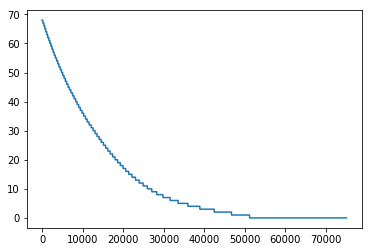

In [23]:
# distribution of requests among the rest of the 70k contents
y = df.values
x = [i for i in range(len(df))]
plt.plot(x,y)

[36.] [68.]


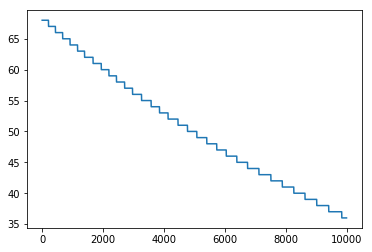

In [24]:
# request frequency distributions for all top 10k contents on day 1
plt.plot(x[:10000],y[:10000])
print(min(y[:10000]), max(y[:10000]))

[0.] [11.]


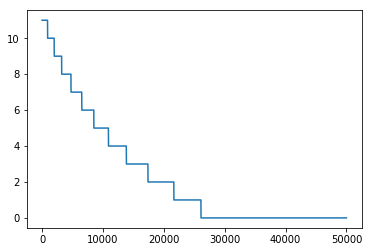

In [27]:
# request frequency distributions for all bottom 50k contents on day 1
plt.plot(x[:50000],y[-50000:])
print(min(y[-50000:]), max(y[-50000:]))

[64.] [67.]


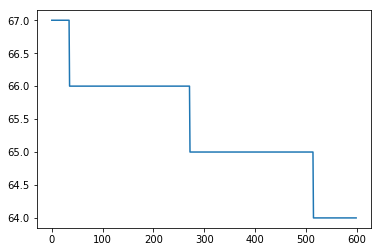

In [30]:
# Will a cache with size 1% have an easy time caching the best contents?
# Since 1% of 75k contents is 750, lets look at the popularities of contents 400-1000
plt.plot(x[:600],y[400:1000])
print(min(y[400:1000]), max(y[400:1000]))

In [ ]:
# popularities of contents above are fairly similar, this demonstrates that caching will still be 
# a difficult problem eventhough the dataset skewed

In [79]:
borderline_ixs = list(df[740:760].index)

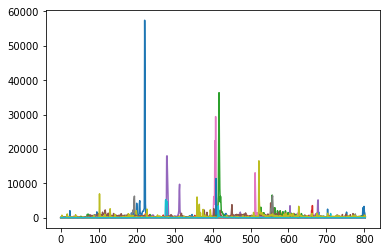

In [81]:
for ix in borderline_ixs:
    tempdf = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', skiprows=range(1,ix+1), nrows=1)
    tempdf.drop('Page', axis=1, inplace=True)
    plt.plot(tempdf.values.flatten())

In [82]:
# the borderline ixs are also inconsistent throughout the entire period (seen through different colored spikes)
# this shows that their popularity is dynamically changing, 
# a property which would make the caching problem more challenging